In [1]:
import numpy as np
from scipy.linalg import solve_triangular
from scipy.linalg import solve

# Y: Simulation scenario 2. Solving triangular system. 

Test cell. Just used for plotting of norm(xSimple - xTriangular)

This is the simplified form of what we do in the next cells. 

b is random here

In [2]:
# cycle
norms = []
for k in range(3, 100):
  sample = np.random.normal(loc = 0, scale = k, size=(k, k))
  # sample = np.random.normal(loc = 0, scale = 1, size=(k, k))
  
  """
  variants of triangular matrix
  a = np.triu(sample) +
  a = np.tril(sample) +
  a = np.triu(sample, 1) - becouse singular matrix 
  a = np.triu(sample, -1) - not equal
  """
  a = np.triu(sample)
  b = np.random.normal(loc = 0, scale=1, size=(k))

  xSimple = np.linalg.solve(a, b)
  xTriangular = solve_triangular(a, b)
  deltaX = xSimple - xTriangular

  normDelta = np.linalg.norm(deltaX)
  sub = []
  sub.append(k)
  sub.append(normDelta)
  norms.append(sub)
#   print("iteration {} - normDelta={}  - ".format(k, normDelta))
  


In [3]:
# First number is matrix size. The second number is norm delta of the solutions
norms[:10]

[[3, 0.0],
 [4, 1.3877787807814457e-17],
 [5, 1.837746106097754e-15],
 [6, 0.0],
 [7, 8.881784197001252e-15],
 [8, 2.612012026770126e-16],
 [9, 2.865085683261398e-14],
 [10, 8.058015926101017e-15],
 [11, 1.2985671487855821e-13],
 [12, 1.648909113805869e-14]]

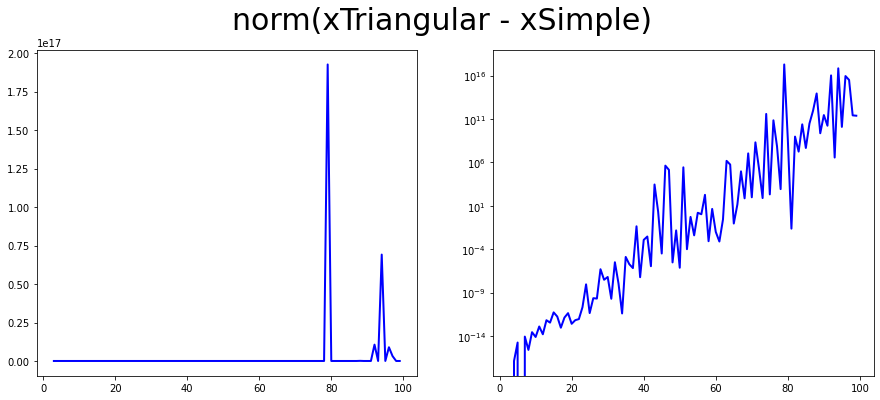

In [4]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
ax1.plot(*zip(*norms), color='blue', lw=2)
# Setting a logarithmic scale for y-axis

ax2.plot(*zip(*norms), color='blue', lw=2)
# ax2.yscale('log')
ax2.set_yscale('log')
fig.suptitle("norm(xTriangular - xSimple)", fontsize = 30)
fig.show()

Function that returns matrix parameters like norm or determinant

In [5]:
import time
def getMatrixParams(a, k, mode='norm'):
    start_time = time.time()
    result = 0
    if mode=='norm':
        result = np.linalg.norm(a)
    elif mode=='det':
        result = abs(np.linalg.det(a))
    elif mode=='cond':
        result = np.linalg.cond(a, p=2)
    end_time = time.time()

    timeres = end_time-start_time
    return [k, result], timeres

Initialization of arrays that will be computed and plotted later

In [6]:
normsD = []
normsSimple = []
normsTrinangular = []

normMatrix = []

dets = []
# detsSimple = []
# detsTrinangular = []

conds = []
# condsSimple = []
# condsTrinangular = []

# times variable
normTime = []
normsSimpleTime = []
normsTrinangularTime = []

detsMatrixTime = []
condsMatrixTime = []
normsMatrixTime = []

Main cycle for solve and solve_triangular

x consists of ones here

In [7]:
SolveTime = []
SolveTriangularTime = []

for k in range(3, 100):
    sample = np.random.normal(loc = 0, scale = k, size=(k, k))
    # sample = np.random.normal(loc = 0, scale = 1, size=(k, k))

    """
    variants of triangular matrix
    a = np.triu(sample) +
    a = np.tril(sample) +
    a = np.triu(sample, 1) - becouse singular matrix 
    a = np.triu(sample, -1) - not equal
    """
    a = np.triu(sample)
    # b = np.random.normal(loc = 0, scale=1, size=(k))
    xTrue = np.ones(k)

    b = a @ xTrue

    # compute time
    start_time = time.time()
    xSimple = np.linalg.solve(a, b)
    end_time = time.time()
    timeres = end_time-start_time
    SolveTime.append(timeres)

    start_time = time.time()
    xTriangular = solve_triangular(a, b)
    end_time = time.time()
    timeres = end_time-start_time
    SolveTriangularTime.append(timeres)


    deltaX = xSimple - xTriangular
    errorSimple = xSimple - xTrue
    errorTriangular = xTriangular - xTrue

    f,d = getMatrixParams(deltaX, k, "norm")
    normsD.append(f)
    
    normTime.append(d)

    f,d = getMatrixParams(errorSimple, k, "norm")
    normsSimple.append(f)
    normsSimpleTime.append(d)

    f,d = getMatrixParams(errorTriangular, k, "norm")
    normsTrinangular.append(f)
    normsTrinangularTime.append(d)

    # normTime = []
    # normsSimpleTime = []
    # normsTrinangularTime = []

    # dets.append(getMatrixParams(deltaX, k, "det"))
    # detsSimple.append(getMatrixParams(errorSimple, k, "det"))
    # detsTrinangular.append(getMatrixParams(errorTriangular, k, "det"))

    # conds.append(getMatrixParams(deltaX, k, "cond"))
    # condsSimple.append(getMatrixParams(errorSimple, k, "cond"))
    # condsTrinangular.append(getMatrixParams(errorTriangular, k, "cond"))

    f, d = getMatrixParams(a, k, "det")
    dets.append(f)
    detsMatrixTime.append(d)

    f, d = getMatrixParams(a, k, "cond")
    conds.append(f)
    condsMatrixTime.append(d)

    f, d = getMatrixParams(a, k, "norm")
    normMatrix.append(f)
    normsMatrixTime.append(d)



Plotting the norms of error vectors

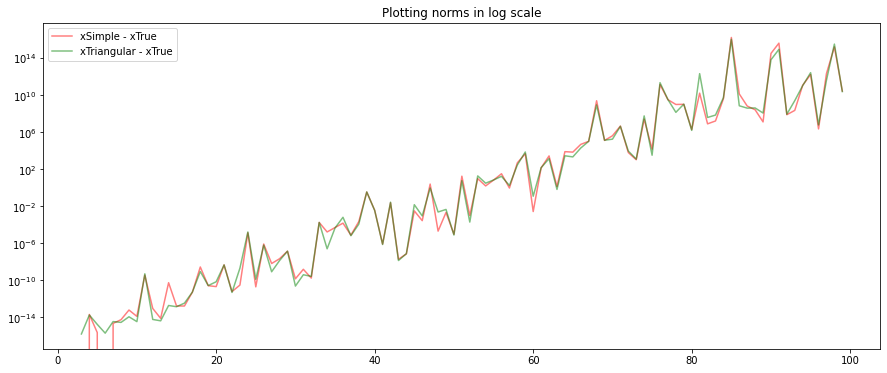

In [8]:
from matplotlib import pyplot
pyplot.figure(figsize=(15,6))
#pyplot.plot(*zip(*normsD), color='blue', label="xSimple - xTriangular", alpha=0.5)
pyplot.plot(*zip(*normsSimple), color='red', label="xSimple - xTrue", alpha=0.5)
pyplot.plot(*zip(*normsTrinangular), color='green', label="xTriangular - xTrue", alpha=0.5)
# Setting a logarithmic scale for y-axis
pyplot.legend()
pyplot.title("Plotting norms in log scale")
pyplot.yscale('log')
pyplot.show()

Same plot of norms of error vectors, but on a regular scale (no log). (Stopped here)

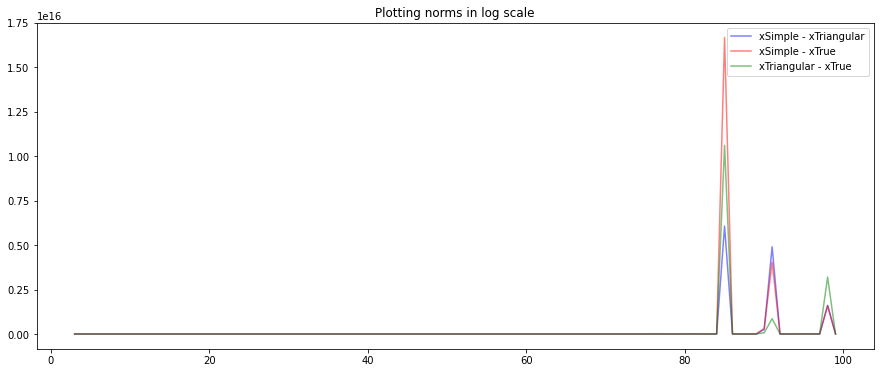

In [9]:
pyplot.figure(figsize=(15,6))
pyplot.plot(*zip(*normsD), color='blue', label="xSimple - xTriangular", alpha=0.5)
pyplot.plot(*zip(*normsSimple), color='red', label="xSimple - xTrue", alpha=0.5)
pyplot.plot(*zip(*normsTrinangular), color='green', label="xTriangular - xTrue", alpha=0.5)
# Setting a logarithmic scale for y-axis
pyplot.title("Plotting norms in log scale")
pyplot.legend()
pyplot.show()

Plotting matrix parameters: norms, conds and determinants. 

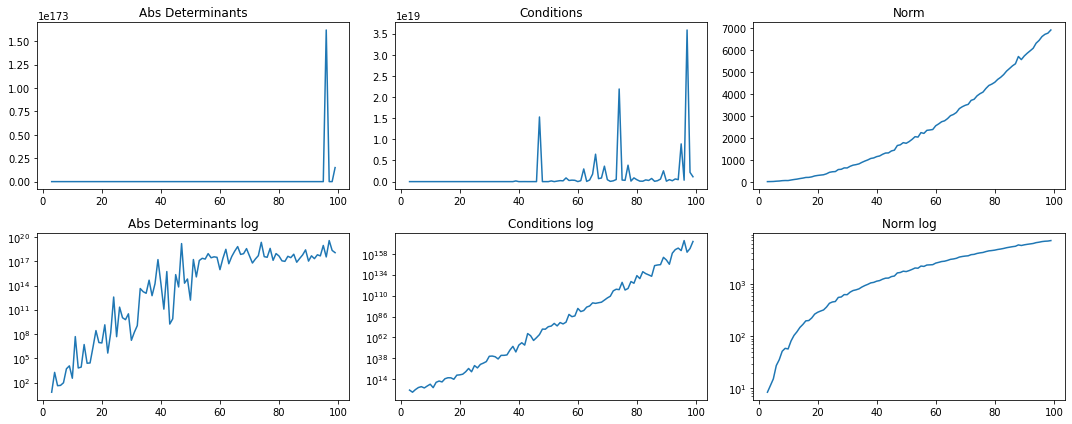

In [10]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15,6))

ax1.plot(*zip(*dets))
ax2.plot(*zip(*conds))
ax3.plot(*zip(*normMatrix))

ax4.plot(*zip(*conds))
ax5.plot(*zip(*dets))
ax6.plot(*zip(*normMatrix))


ax1.set_title("Abs Determinants")
ax2.set_title("Conditions")
ax3.set_title("Norm")

ax4.set_title("Abs Determinants log")
ax5.set_title("Conditions log")
ax6.set_title("Norm log")

ax4.set_yscale('log')
ax5.set_yscale('log')
ax6.set_yscale('log')

plt.tight_layout()




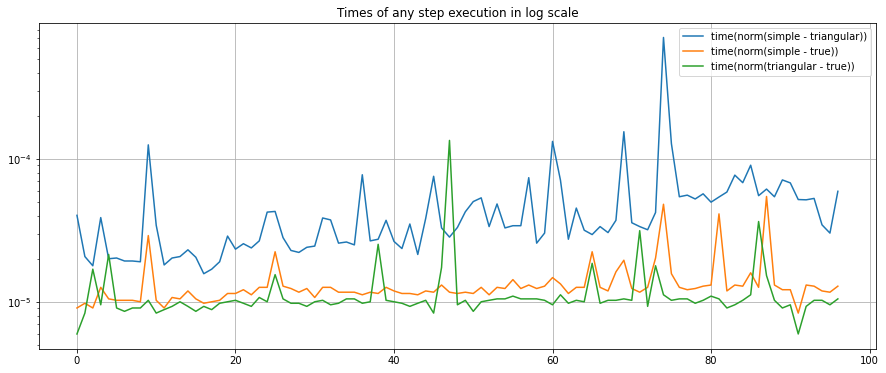

In [11]:
# time plotting

plt.figure(figsize=(15,6))
plt.plot(normTime, label="time(norm(simple - triangular))")
plt.plot(normsSimpleTime, label="time(norm(simple - true))")
plt.plot(normsTrinangularTime, label="time(norm(triangular - true))")
plt.legend()
plt.yscale('log')
plt.title("Times of any step execution in log scale")
plt.grid()

In [12]:
len(detsMatrixTime),len(condsMatrixTime), len(normsMatrixTime)

(97, 97, 97)

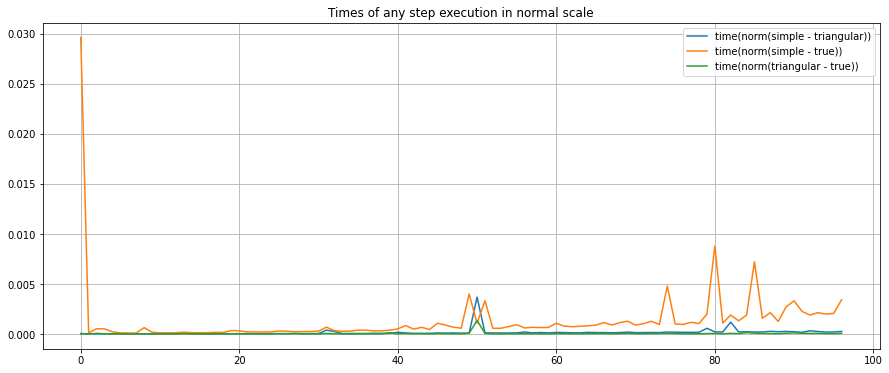

In [13]:
plt.figure(figsize=(15,6))
plt.plot(detsMatrixTime, label="time(norm(simple - triangular))")
plt.plot(condsMatrixTime, label="time(norm(simple - true))")
plt.plot(normsMatrixTime, label="time(norm(triangular - true))")
plt.legend()
# plt.yscale('log')
plt.title("Times of any step execution in normal scale")
plt.grid()


In [14]:
len(detsMatrixTime)

97

In [15]:
def time_aproximation(inputlist):
    ntime = []
    ntime.append(inputlist[0])
    for i in range(1, len(inputlist)):
        ntime.append(ntime[i-1] + inputlist[i])

    return ntime

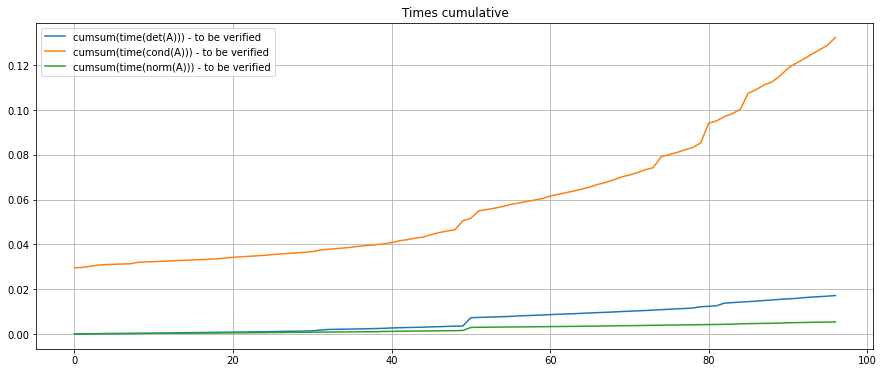

In [16]:
plt.figure(figsize=(15,6))
plt.plot(time_aproximation(detsMatrixTime), label="cumsum(time(det(A))) - to be verified")
plt.plot(time_aproximation(condsMatrixTime), label="cumsum(time(cond(A))) - to be verified")
plt.plot(time_aproximation(normsMatrixTime), label="cumsum(time(norm(A))) - to be verified")
plt.legend()
plt.title("Times cumulative")
plt.grid()

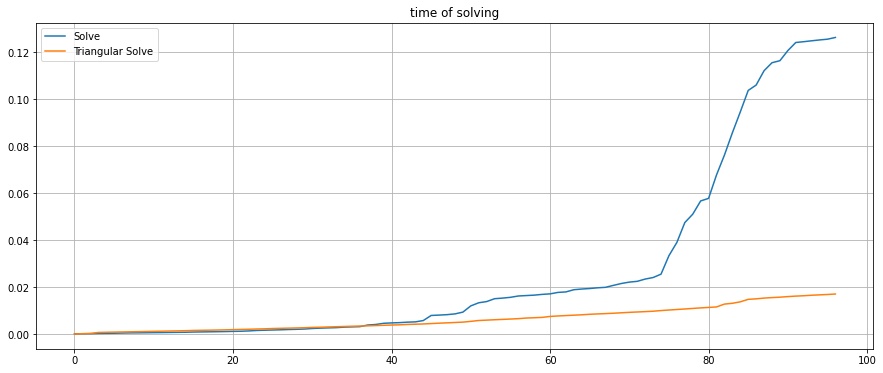

In [17]:
plt.figure(figsize=(15,6))
plt.plot(time_aproximation(SolveTime), label="Solve")
plt.plot(time_aproximation(SolveTriangularTime), label="Triangular Solve")
plt.legend()
plt.title("time of solving")
plt.grid()